<a href="https://colab.research.google.com/github/krmiddlebrook/intro_to_deep_learning/blob/master/basics/Basics_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basic Pandas Functions for Data Science

In [ ]:
import pandas as pd

In [ ]:
# loading dataset into a dataframe
data_url = 'https://raw.githubusercontent.com/krmiddlebrook/intro_to_deep_learning/master/datasets/world-happiness/2019.csv'
df = pd.read_csv(data_url)

In [ ]:
# view the shape of a dataframe
df.shape

(156, 9)

In [ ]:
# viewing the first n rows of the data
df.head(n=5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
# selecting specific columns
df.loc[:, ['Overall rank', 'Country or region']].head()

,Overall rank,Country or region
0,1,Finland
1,2,Denmark
2,3,Norway
3,4,Iceland
4,5,Netherlands


In [ ]:
# selecting specific rows
df.loc[0:5, :]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


In [ ]:
# counting the number of unique values in a row
df.loc[:, 'Country or region'].nunique()

156

In [ ]:
# counting the number of rows corresponding to each unique value in a column
df.loc[:, 'Score'].value_counts()

5.208    2
5.467    1
7.139    1
4.944    1
4.350    1
        ..
6.028    1
5.274    1
6.825    1
6.300    1
6.375    1
Name: Score, Length: 155, dtype: int64

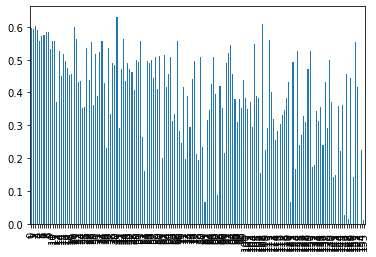

In [ ]:
# ploting the distribution of values in a column
df.loc[:, 'Freedom to make life choices'].plot(kind='bar')

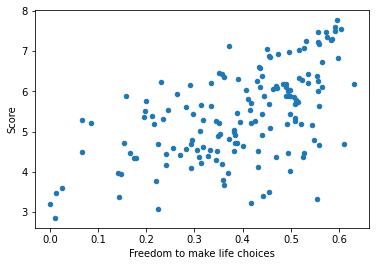

In [ ]:
# ploting the distribution of values in a two columns
df.loc[:, ['Score', 'Freedom to make life choices']].plot(kind='scatter', x='Freedom to make life choices', y='Score')

In [ ]:
# combining two dataframes
combined = pd.concat((df, df), axis=1) # column-wise concatenation
print('column-wise concatenation', combined.shape)

combined = pd.concat((df, df), axis=0) # row-wise cocatenation
print('row-wise concatenation', combined.shape)

column-wise concatenation (156, 20)
row-wise concatenation (312, 10)


In [ ]:
# create new dataframe column
df['new_col'] = "I'm new"
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,new_col
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,I'm new
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,I'm new
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,I'm new
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,I'm new
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,I'm new


In [ ]:
# joining/merging two dataframes
joined = df.merge(combined, how='inner', on='Country or region')
print(joined.shape)
joined.head()

(312, 19)


,Overall rank_x,Country or region,Score_x,GDP per capita_x,Social support_x,Healthy life expectancy_x,Freedom to make life choices_x,Generosity_x,Perceptions of corruption_x,new_col_x,Overall rank_y,Score_y,GDP per capita_y,Social support_y,Healthy life expectancy_y,Freedom to make life choices_y,Generosity_y,Perceptions of corruption_y,new_col_y
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,I'm new,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,I'm new
1,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,I'm new,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,I'm new
2,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,I'm new,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,I'm new
3,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,I'm new,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,I'm new
4,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,I'm new,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,I'm new
